# AlexNet

In [1]:
import tensorflow as tf

# 1 模型构建

In [2]:
net = tf.keras.models.Sequential([
    # 卷积层：96（神经元个数）  11*11（卷积大小）  4（步长）  relu（激活函数）
    tf.keras.layers.Conv2D(filters = 96, kernel_size = 11, strides = 4, activation = "relu"),
    # 池化层：3*3  2（步长）
    tf.keras.layers.MaxPool2D(pool_size = 3, strides = 2),
    # 卷积：256  5*5  1  relu  same
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 5, strides = 1, activation = "relu", padding = "same"),
    # 池化：3*3  2
    tf.keras.layers.MaxPool2D(pool_size = 3, strides = 2),
    # 卷积：384  3*3  1  relu  same
    tf.keras.layers.Conv2D(filters = 384, kernel_size = 3, strides = 1, activation = "relu", padding = "same"),
    # 卷积：384  3*3  1  relu  same
    tf.keras.layers.Conv2D(filters = 384, kernel_size = 3, strides = 1, activation = "relu", padding = "same"),
    # 卷积：256  3*3  1  relu  same
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, strides = 1, activation = "relu", padding = "same"),
    # 池化：3*3  2
    tf.keras.layers.MaxPool2D(pool_size = 3, strides = 2),
    # 展开
    tf.keras.layers.Flatten(),
    # 全连接层：4096， relu
    tf.keras.layers.Dense(4096, activation = 'relu'),
    # 随机失活
    tf.keras.layers.Dropout(0.5),
    # 输出层
    tf.keras.layers.Dense(10, activation = "softmax")
])

In [3]:
X = tf.random.uniform((1, 227, 227, 1))
y = net(X)
net.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (1, 55, 55, 96)        │        11,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (1, 27, 27, 96)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (1, 27, 27, 256)       │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (1, 13, 13, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (1, 13, 13, 384)       │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (1, 13, 13, 384)       │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (1, 13, 13, 256)       │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (1, 6, 6, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (1, 9216)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1, 4096)              │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (1, 4096)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 10)                │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,517,770 (158.38 MB)

 Trainable params: 41,517,770 (158.38 MB)

 Non-trainable params: 0 (0.00 B)

# 2 数据读取

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
# 维度调整         (样本数， 28， 28)-->(样本数， 28， 28， 1)
train_images = np.reshape(train_images, (train_images.shape[0], #训练样本的数量
                                         train_images.shape[1], #图像的高度
                                         train_images.shape[2], #宽度
                                         1))
test_images = np.reshape(test_images, (test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))

In [9]:
# 对训练数据进行抽样
def get_train(size):
    index = np.random.randint(0, train_images.shape[0], size)
    # 选择图像并进行resize
    resized_images = tf.image.resize_with_pad(train_images[index], #根据索引选择对应图像。
                                              227, 227, ) # 使用 TensorFlow 的函数将图像调整为 227×227（不足部分填充 0）
    return resized_images.numpy(), train_labels[index]

In [10]:
# 对测试数据进行抽样
def get_test(size):
    index = np.random.randint(0, test_images.shape[0], size)
    # 选择图像并进行resize
    resized_images = tf.image.resize_with_pad(test_images[index], 227, 227, )
    return resized_images.numpy(), test_labels[index]

In [11]:
# 抽样结果
train_images, train_labels = get_train(256)
test_images, test_labels = get_test(128)

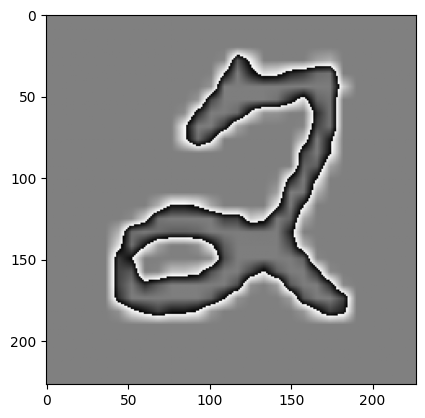

In [12]:
import matplotlib.pyplot as plt
plt.imshow(train_images[4] # 显示第 5 张训练图像
           .astype(np.int8).squeeze(), cmap = 'gray')

# 3 模型编译

In [13]:
# 优化器，损失函数，评价指标
net.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
            loss = tf.keras.losses.sparse_categorical_crossentropy,
            metrics = ['accuracy'])

# 4 模型训练

In [15]:
net.fit(train_images, train_labels, batch_size = 128, epochs = 3, verbose = 1, validation_split = 0.1)

Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.1179 - loss: 169.2490 - val_accuracy: 0.1154 - val_loss: 458432.9688
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.0953 - loss: 164064199284642283520.0000 - val_accuracy: 0.0385 - val_loss: nan
Epoch 3/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.1034 - loss: nan - val_accuracy: 0.0385 - val_loss: nan


# 5 模型评估

In [16]:
net.evaluate(test_images, test_labels, verbose = 1) # 使用数据量太少，发生梯度爆炸

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.0708 - loss: nan


[nan, 0.0625]